Priority Queues
===============



## Agenda



1.  Motives
    - priority queue: stores number (or items that have a value)
    - add(item): insert item into the queue
    - pop_max() - return and remove item with maximum value
    - 
2.  Naive implementation
3.  Heaps
    -   Mechanics
    -   Implementation
    -   Run-time Analysis

4.  Heapsort



## 1.  Motives



## 1.  Naive implementation



In [1]:
class PriorityQueue:
    def __init__(self):
        self.data = []

    def add(self, x):
        self.data.append(x)
        self.data = sorted(self.data)

    def max(self):
        return self.data[-1]

    def pop_max(self):
        m = self.data[-1]
        del self.data[-1]
        return m

    def __bool__(self):
        return len(self.data) > 0

    def __len__(self):
        return len(self.data)

    def __repr__(self):
        return repr(self.data)

In [2]:
pq = PriorityQueue()

In [3]:
import random
for _ in range(10):
    pq.add(random.randrange(100))

In [4]:
pq

[8, 11, 27, 47, 72, 72, 82, 82, 97, 99]

In [5]:
while pq:
    print(pq.pop_max())

99
97
82
82
72
72
47
27
11
8


## 1.  Heaps



### Mechanics



### Implementation



In [22]:
class Heap:
    def __init__(self):
        self.data = []

    @staticmethod
    def parent(n):
        if n % 2 == 0: ##even
            return (n-2) // 2
        return (n-1) // 2

    @staticmethod
    def left_child(n):
        return 2*n + 1

    @staticmethod
    def right_child(n):
        return 2*n + 2
    
    
    def pos_exists(self, n):
        return n < len(self) #shouldn't this be "<" ???
 
    def switch_node(self, parent, child):
        parentval = self.data[parent]
        childval = self.data[child]
        self.data[parent] = childval
        self.data[child] = parentval
    
    def trickle_down(self, n):
        lc = Heap.left_child(n)
        rc = Heap.right_child(n)
        curval = self.data[n]
        if self.pos_exists(lc): 
            if self.pos_exists(rc):
                lcval = self.data[lc]
                rcval = self.data[rc]
                
                if lcval > curval or rcval > curval:
                    if lcval > rcval: 
                        self.switch_node(n, lc)
                        self.trickle_down(lc)
                    else:
                        self.switch_node(n, rc)
                        self.trickle_down(rc)
                
            else:
                lcval = self.data[lc]
                if lcval > curval:
                    self.switch_node(n, lc)
                    self.trickle_down(lc)

        if self.pos_exists(rc): 
            rcval = self.data[rc]
            if lcval > curval:
                self.switch_node(n, rc)
                self.trickle_down(rc)
                    
    def trickle_up(self,n):
        if n>0:
            p = Heap.parent(n)
            pval = self.data[p]
            curval = self.data[n]
            if pval < curval:
                self.switch_node(p, n)
                self.trickle_up(p)
    
    def add(self, x):
        self.data.append(x)
        self.trickle_up(len(self.data) - 1)

    
    def max(self):
        self.data[-1]

    def pop_max(self):
        m = self.data[0]
        self.data[0] = self.data[-1]
        del self.data[-1]

        if len(self.data) > 0:
            self.trickle_down(0)

        return m

    def __bool__(self):
        return len(self.data) > 0

    def __len__(self):
        return len(self.data)

    def __repr__(self):
        return repr(self.data)

In [23]:
h = Heap()

In [24]:
import random
for _ in range(10):
    h.add(random.randrange(100))
    print(h)

[50]
[50, 22]
[50, 22, 19]
[68, 50, 19, 22]
[89, 68, 19, 22, 50]
[89, 68, 25, 22, 50, 19]
[96, 68, 89, 22, 50, 19, 25]
[96, 68, 89, 29, 50, 19, 25, 22]
[96, 68, 89, 29, 50, 19, 25, 22, 23]
[96, 68, 89, 29, 50, 19, 25, 22, 23, 49]


In [25]:
h

[96, 68, 89, 29, 50, 19, 25, 22, 23, 49]

In [26]:
while h:
    print(h.pop_max())

96
49
25
23
22
19
50
29
89
68


In [35]:
h = Heap()
l = [4, 2, 7, 16, 254, 43, 34, 23]
for i in l:
    h.add(i)
s = [None] * len(l)
for i in range(-1, -1*len(l) - 1, -1):
    s[i] = h.pop_max()
s

[None, 34, 16, 7, 4, 43, 2, 254]

### Run-time Analysis
- max: O(1)
- add: O(logn)
- pop_max: O(logn) #from trickling down root


## 1.  Heapsort



In [42]:
def heapsort(iterable):
    heap = Heap()
    for i in iterable:
        heap.add(i)
    s = [None] * len(heap)
    for i in range(-1, -1*len(s) - 1, -1):
        s[i] = heap.pop_max()
    return s

In [43]:
import random

def pairs(iterable):
    it = iter(iterable)
    a = next(it)
    while True:
        b = next(it)
        yield a,b
        a = b

lst = heapsort(random.random() for _ in range(1000))
all((a <= b) for a, b in pairs(lst)) #should be true but returns false b/c boris has broken heap implementation...

False

In [44]:
import timeit
def time_heapsort(n):
    return timeit.timeit('heapsort(rlst)',
                         'from __main__ import heapsort; '
                         'import random; '
                         'rlst = (random.random() for _ in range({}))'.format(n),
                         number=1000)

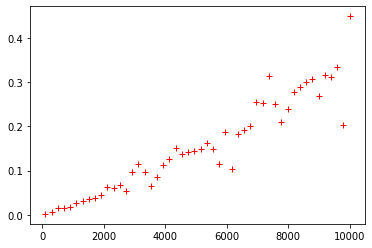

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

ns = np.linspace(100, 10000, 50, dtype=np.int_)
plt.plot(ns, [time_heapsort(n) for n in ns], 'r+')
plt.show()

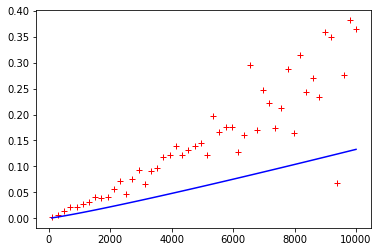

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

ns = np.linspace(100, 10000, 50, dtype=np.int_)
plt.plot(ns, [time_heapsort(n) for n in ns], 'r+')
plt.plot(ns, ns*np.log2(ns)*0.01/10000, 'b') # O(n log n) plot
plt.show()